<h2> <b>ExNo:2</b> </h2>
<h2><b>Date: 11-01-2024</b></h2>
<h2><b><center> FEATURE SELECTION AND FEATURE EXTRACTION </center></b> </h2>    

<h3> AIM </h3>

<p>To implement feature selection and feature extraction techniques on a given dataset.</p>

<h3> Description </h3>

<h4> Feature Selection: </h4>

<p> Process of selecting a subset of relevant features from the original features to reducemodel complexity, enhance the computational efficiency of the models and reduce generalization error introduced dur to noise by irrelevant features.</p>

* Methods
    * Remove unused columns
    * Remove column with outlier
    - Remove features with missing values
    - Remove features with low variance
    - Removeuncorrelatedfeatureswithtarget
    - Remove highly correlated features – Multicollinearity o Univariatefeatureselection
    - Informationgain-basedfeatureselection
* Univariate Feature Selection
    * Statistical tests can help to select independent features that have the strongestrelationship with the target feature
    * The Scikit-learn library provides the SelectKBest class that can be used with asuite of different statistical tests to select a specific number of features.
* Information gain-based feature selection
    * It calculates mutual information value for each of independent variables respectto dependent variable, and selects the ones which has most information gain.
    * It basically measures the dependency of features with the target value.

<h4> FEATURE EXTRACTION:</h4>

* Feature extraction refers to the process of transforming original features into a newset of features that preserve the information in the original data set.
* It yields better results than applying machine learning directly to the raw data.
* Principal Component Analysis
    * PCA is a dimensionality reduction technique that enables you to identify correlations and patterns in the data set so that it can be transformed into a data set of significantly lower dimension without loss of important information.
* Linear Discriminant Analysis
    * PCA is an unsupervised dimensionality reduction technique while LDA is a supervised dimensionality reduction technique.
    * PCA summarizes the feature set without relying on the output.
    * LDA tries to reduce dimensions of the feature set while retaining the information.

<h4> DATA REDUCTION:</h4>

Data reduction techniques can be applied to obtain a reduced representation of the data set that is much smaller in volume, yet closely maintains the integrity of the original data.
    
* Dimensionality reduction, numerosity reduction, data compression.
* Feature selection and Feature extraction
* Drop missing values
* Drop the outliers
* Drop duplicates

<h4> DIMENSIONALITY REDUCTION:</h4>

Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set. It yields better results than applying machine learning directly to the raw data. One-Hot encoding – creates additional features based on the number of unique values in the categorical feature, create dummy variables.

There are various methods to reduce the dimensionality of the data:
    
1. Feature Selection Methods: Using Correlation Coefficient Methods 2. Matrix Factorization: PCA
3. Manifold Learning: t-SNE
4. Auto Encoders

<h4> Correlation Coefficient Methods: </h4>

Some of the datasets have a large number of features, and only some of these features are correlated with the target class label. Feature selection techniques use scoring or statistical methods to select which features to keep and which features to delete.

Techniques or algorithms used to reduce dimensions by Correlation Coefficient Methods are:
1. Pearson Correlation Coefficient
2. Spearman Correlation Coefficient
3. Chi-Squared Test
4. Kendall Tau Test

<h4> Matrix Factorization:</h4>

Matrix Factorization methods can be used for dimension reduction. Principal Component Analysis (PCA) is a matrix factorization technique to reduce higher dimension data to lower dimensions. PCA preserves the direction with maximal variance.

<h4> Steps to follow for PCA:</h4>

1. Given dataset X of shape (n-rows, d-features)
2. Standardize the dataset X
3. Compute covariance matrix (S)
4. Find eigenvalues and eigenvector from the covariance matrix.
5. To pick top f features, pick the eigenvectors having corresponding top x largest eigenvalues.

<h3> Q1: Read and analyze the data </h3>

In [35]:
#code
import pandas as pd
df = pd.read_csv("Loan.csv")
df.head()
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h3> Q2: Split the dataset into train and test sets. </h3>

In [42]:
df.shape

(614, 13)

In [47]:
#code
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:12]
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


<h3>Q3: check shape of training and test sets </h3>

In [48]:
#code
#Training sets shape
print(X_train.shape)
#Testing sets shape
print(X_test.shape)

(429, 12)
(185, 12)


<h3>Q4: Perform scaling in the data using Standard Scalar </h3>

In [49]:
#code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
#feature encoding
# Identify categorical columns
cat_columns = X.select_dtypes(include=['object']).columns

# Check the number of unique categories in each categorical feature
X[cat_columns].nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
dtype: int64

In [51]:
# Check the distribution of categories within each feature
for col in cat_columns:
    print(f"\nDistribution of categories in {col}:")
    print(X[col].value_counts())


Distribution of categories in Loan_ID:
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

Distribution of categories in Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64

Distribution of categories in Married:
Married
Yes    398
No     213
Name: count, dtype: int64

Distribution of categories in Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Distribution of categories in Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Distribution of categories in Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Distribution of categories in Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [9]:
# for columns Self_Employed ,Married binary mapping since it is with yes or no
binary_mapping = {'Yes': 1, 'No': 0}
df['Self_Employed'] = df['Self_Employed'].map(binary_mapping)
df['Married'] = df['Married'].map(binary_mapping)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
from sklearn.preprocessing import LabelEncoder
#label encoder for ordinal data Loan_ID
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,0.0,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Male,1.0,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,Male,1.0,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,Male,1.0,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,Male,0.0,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# Apply one-hot encoding to 'Gender', 'Dependents', 'Education' and 'Property Area'
df = pd.get_dummies(df, columns=['Gender', 'Dependents','Education','Property_Area'])

In [12]:
#from sklearn.preprocessing import OrdinalEncoder
#ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
#df['ordinal_column'] = ordinal_encoder.fit_transform(df[['ordinal_column']])

In [13]:
df.head()

,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.0,0.0,5849,0.0,NaN,360.0,1.0,Y,False,True,True,False,False,False,True,False,False,False,True
1,1,1.0,0.0,4583,1508.0,128.0,360.0,1.0,N,False,True,False,True,False,False,True,False,True,False,False
2,2,1.0,1.0,3000,0.0,66.0,360.0,1.0,Y,False,True,True,False,False,False,True,False,False,False,True
3,3,1.0,0.0,2583,2358.0,120.0,360.0,1.0,Y,False,True,True,False,False,False,False,True,False,False,True
4,4,0.0,0.0,6000,0.0,141.0,360.0,1.0,Y,False,True,True,False,False,False,True,False,False,False,True


In [14]:
from sklearn.preprocessing import StandardScaler
df_new = df.copy()
X = df_new.drop(columns=['Loan_Status'])
y = df["Loan_Status"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Create a DataFrame with scaled data
df_scaled = pd.DataFrame(scaled_data, columns=X.columns)
df_scaled.head()


,Loan_ID,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.729232,-1.366947,-0.404969,0.072991,-0.554487,NaN,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-0.641478,-0.782016,1.428147
1,-1.723590,0.731557,-0.404969,-0.134412,-0.038732,-0.215309,0.276642,0.432861,-0.472343,0.505592,-1.132487,2.240448,-0.443713,-0.300975,0.528362,-0.528362,1.558899,-0.782016,-0.700208
2,-1.717948,0.731557,2.469324,-0.393747,-0.554487,-0.940328,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-0.641478,-0.782016,1.428147
3,-1.712307,0.731557,-0.404969,-0.462062,0.251980,-0.308860,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,-1.892641,1.892641,-0.641478,-0.782016,1.428147
4,-1.706665,-1.366947,-0.404969,0.097728,-0.554487,-0.063289,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-0.641478,-0.782016,1.428147


<h3> Q5: Calculate the % of missing values in a column. </h3>

In [15]:
#code
# Check the percentage of missing values in each column
missing_percent = df_scaled.isnull().mean().sort_values(ascending=False) * 100
print("Missing Value Percentage by Columns:\n", round(missing_percent,2))

Missing Value Percentage by Columns:
 Credit_History             8.14
Self_Employed              5.21
LoanAmount                 3.58
Loan_Amount_Term           2.28
Married                    0.49
Loan_ID                    0.00
Dependents_2               0.00
Property_Area_Semiurban    0.00
Property_Area_Rural        0.00
Education_Not Graduate     0.00
Education_Graduate         0.00
Dependents_3+              0.00
Gender_Male                0.00
Dependents_1               0.00
Dependents_0               0.00
Gender_Female              0.00
CoapplicantIncome          0.00
ApplicantIncome            0.00
Property_Area_Urban        0.00
dtype: float64


<h3> Q6: Remove features with missing values (&gt;20%)</h3>

In [16]:
#code
# List of columns to drop
columns_to_drop = ['Married', 'Self_Employed']
# Drop the specified columns
df_dropped = df_scaled.drop(columns=columns_to_drop)

<h3> Q7: If the missing values is &lt;20% ,do data imputation(mean/median)</h3>

In [17]:
#code
# Impute missing values with the median
df_impute = df_dropped.fillna(df_dropped.median())

# Display the DataFrame after imputation
df_impute.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.729232,0.072991,-0.554487,-0.215309,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-0.641478,-0.782016,1.428147
1,-1.723590,-0.134412,-0.038732,-0.215309,0.276642,0.432861,-0.472343,0.505592,-1.132487,2.240448,-0.443713,-0.300975,0.528362,-0.528362,1.558899,-0.782016,-0.700208
2,-1.717948,-0.393747,-0.554487,-0.940328,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-0.641478,-0.782016,1.428147
3,-1.712307,-0.462062,0.251980,-0.308860,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,-1.892641,1.892641,-0.641478,-0.782016,1.428147
4,-1.706665,0.097728,-0.554487,-0.063289,0.276642,0.432861,-0.472343,0.505592,0.883012,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,-0.641478,-0.782016,1.428147


<h3> Q8: Visulaize the Outliers and Remove the same. </h3>

In [18]:
#code
import seaborn as sns
import matplotlib.pyplot as plt


<h3> Q9: Use sklearn variance threshold to find the constant features and display the constant
features </h3>

In [19]:
#code

In [20]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

<h3>Q10: Display and Remove features with low variance </h3>

In [21]:
#code

<h3>Q11: Visulize and Remove highly correlated features </h3>

In [22]:
#code
# Create a heatmap using seaborn


<h3>Q12: Perform Univariate feature selection(SelectKBest, SelectPercentile) </h3>

In [23]:
#code
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 7)


In [24]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_digits(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X_new.shape)

(1797, 64)
(1797, 20)


<h3>Q13: Apply Pearson Correlation Coefficient/Spearman’s rank coefficient and find
Correlation-Matrix with Heatmap </h3>

In [25]:
#code
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


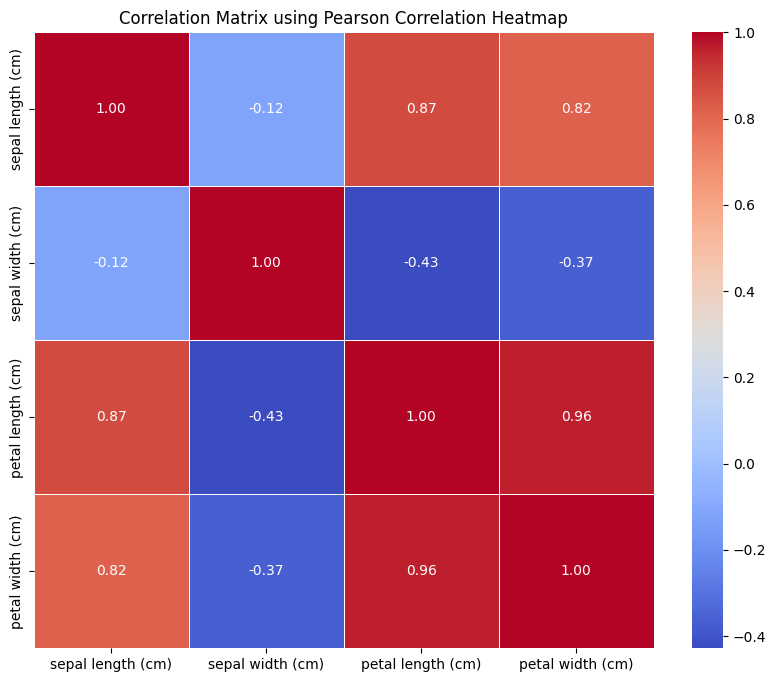

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset (as an example)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Calculate the correlation matrix using Pearson correlation
correlation_matrix = X.corr(method='pearson')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix using Pearson Correlation Heatmap')
plt.show()




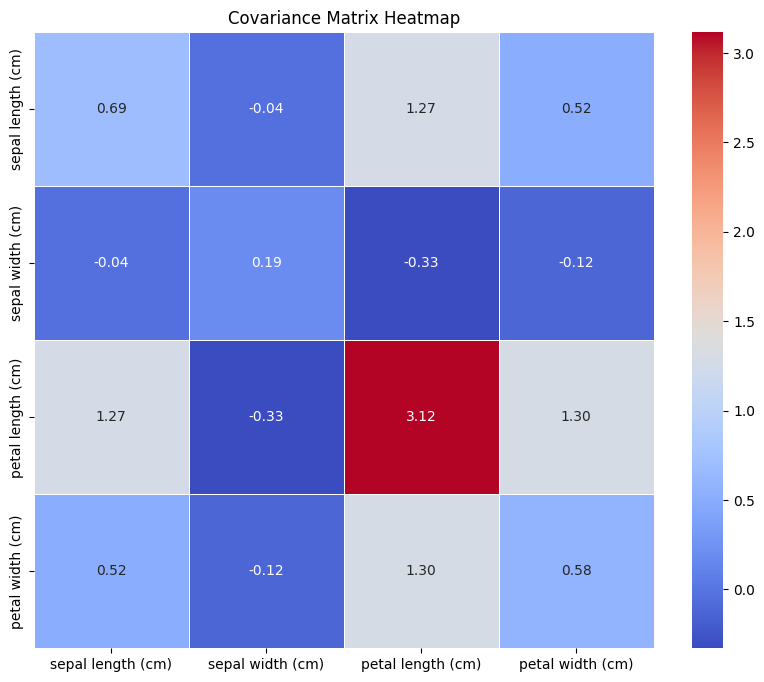

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset (as an example)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Calculate the covariance matrix
cov_matrix = X.cov()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()


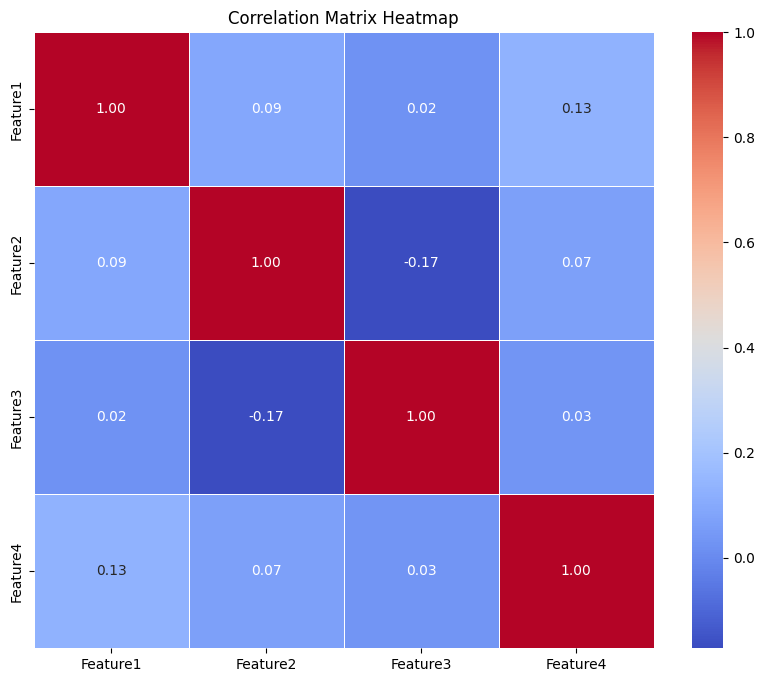

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Feature3': np.random.rand(100),
        'Feature4': np.random.rand(100)}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


<h3>Q14: Apply Principal Component Analysis(PCA) for matrix factorization </h3>

In [29]:
#code

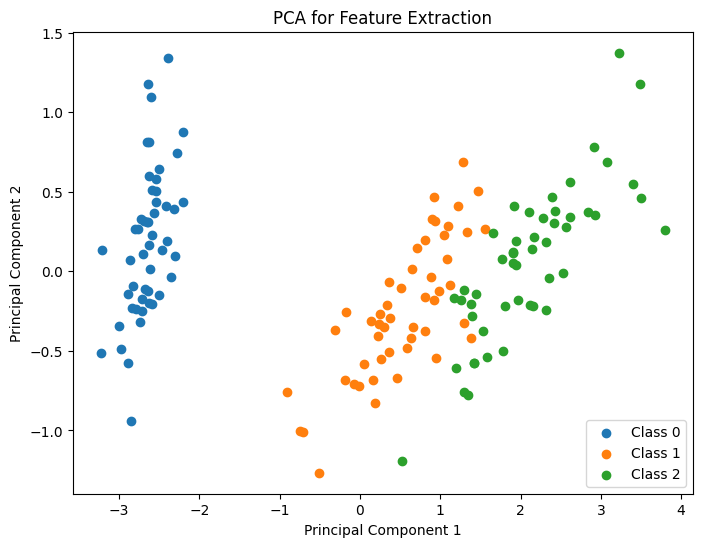

In [30]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset (as an example)
iris = load_iris()
X = iris.data
y = iris.target

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))

for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f'Class {label}')

plt.title('PCA for Feature Extraction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


<h3>Q15: Apply Linear Discriminant Analysis (LDA) to perform feature extraction </h3>

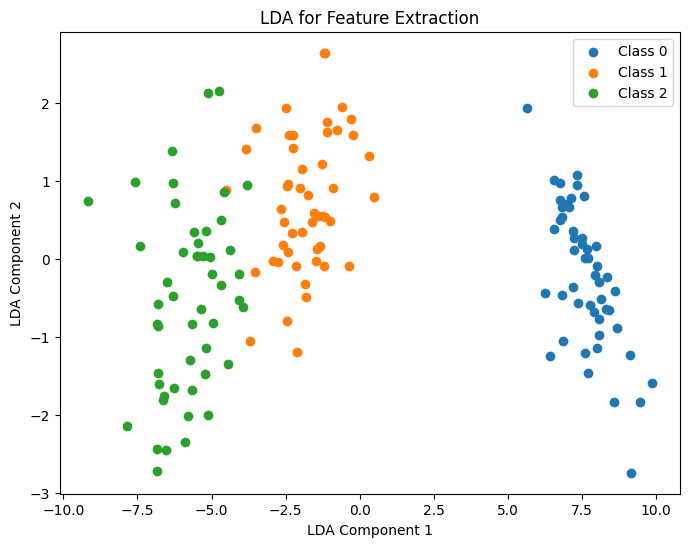

In [31]:
#code
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load the Iris dataset (as an example)
iris = load_iris()
X = iris.data
y = iris.target

# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform the data
X_lda = lda.fit_transform(X, y)

# Plot the results
plt.figure(figsize=(8, 6))

for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f'Class {label}')

plt.title('LDA for Feature Extraction')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()
